<a href="https://colab.research.google.com/github/leovianaf/transformers-ia/blob/main/NLP_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pip install transformers torch

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import AutoModelForSeq2SeqLM
from transformers import AutoModelForQuestionAnswering
from transformers import pipeline
import torch

**Pré-processamento:** Limpeza, preparação e tokenização dos dados.  
**Modelo:** Transformação em embeddings, mecanismo de atenção, feed-forward, normalização e predição de logits.  
**Pós-processamento:** Interpretação dos resultados, extração de resultados, conversão para formato legível, refinamento e ajustes.

# Como pode ser representado o Pipeline?

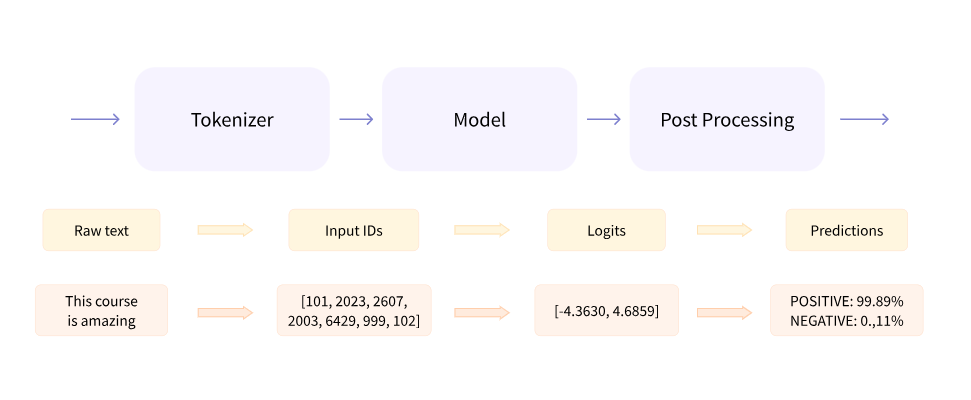

#Análise de sentimento - pipeline

In [17]:
classifier = pipeline("sentiment-analysis")
classifier("I loved Star Wars so much!")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.999840259552002}]

A tarefa de análise de sentimento consiste em determinar se um texto expressa uma emoção positiva, negativa ou neutra. A pipeline utilizada aqui seleciona automaticamente um modelo treinado para esta tarefa (por exemplo, `distilbert-base-uncased-finetuned-sst-2-english`), que foi pré-treinado e otimizado para identificar sentimentos em textos.

- **DistilBERT**: É uma versão menor e mais rápida do BERT, que mantém cerca de 97% do desempenho do BERT original, mas é 60% menor e duas vezes mais rápido.

#Classificação de Texto - Pipeline

Verificar o que ele vai identificar

Pipeline para classificação de texto usando o modelo BERT pré-treinado

In [18]:
classifier_txt = pipeline("text-classification", model="bert-base-uncased")

texts_classif = [
    "I love this movie! It's fantastic.",
    "I hate this movie. It's terrible."
]

results = classifier_txt(texts_classif)
print(results)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[{'label': 'LABEL_1', 'score': 0.5124030113220215}, {'label': 'LABEL_1', 'score': 0.5319948792457581}]


`bert-base-uncased`
- Refere-se a uma versão do modelo BERT que foi treinada em texto onde todas as letras foram convertidas para minúsculas, e que não diferencia entre maiúsculas e minúsculas ("uncased").

## BERT (Bidirectional Encoder Representations from Transformers)
- É um dos modelos de Transformers mais populares. Ele é bidirecional, o que significa que, ao processar uma palavra em uma frase, ele considera tanto o contexto à esquerda quanto à direita da palavra. Isso melhora a compreensão do contexto em relação aos modelos unidirecionais mais antigos.

#Classificação - pipeline

In [19]:
classifier_multi = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Textos para classificação
texts_classif = [
    "I love this movie! It's fantastic.",
    "The political situation is very tense.",
    "The new technology in AI is groundbreaking.",
    "The recent club world cup was amazing."
]

# Labels(categorias) que você deseja classificar
candidate_labels = ["entertainment", "politics", "technology", "sports"]

# Para cada texto, aplicamos a classificação de zero-shot com as labels fornecidas
results = [classifier_multi(text, candidate_labels) for text in texts_classif]

# Imprimir os resultados
for result in results:
    print(result)

{'sequence': "I love this movie! It's fantastic.", 'labels': ['entertainment', 'technology', 'sports', 'politics'], 'scores': [0.9879550933837891, 0.00793242547661066, 0.0022735341917723417, 0.0018389704637229443]}
{'sequence': 'The political situation is very tense.', 'labels': ['politics', 'sports', 'technology', 'entertainment'], 'scores': [0.9967356324195862, 0.0012725814012810588, 0.0010354181285947561, 0.0009563835337758064]}
{'sequence': 'The new technology in AI is groundbreaking.', 'labels': ['technology', 'sports', 'entertainment', 'politics'], 'scores': [0.9918227195739746, 0.0032521444372832775, 0.002681736834347248, 0.0022433840204030275]}
{'sequence': 'The recent club world cup was amazing.', 'labels': ['sports', 'entertainment', 'technology', 'politics'], 'scores': [0.7970700263977051, 0.19319427013397217, 0.00835835374891758, 0.00137736601755023]}


`model="facebook/bart-large-mnli"`
- Este modelo é uma variante do BART (Bidirectional and Auto-Regressive Transformers), treinado na tarefa de inferência textual usando o dataset MNLI (Multi-Genre Natural Language Inference). Ele é capaz de comparar um texto com várias categorias ou descrições e determinar o quão bem o texto se encaixa em cada uma delas.

## BART (Bidirectional and Auto-Regressive Transformers)
- É um modelo Transformer que combina ideias de modelos de sequência-para-sequência, como o Transformer padrão, com técnicas de pré-treinamento semelhantes às usadas no BERT. Ele é especialmente eficaz em tarefas de geração de texto, como tradução, geração de texto e sumarização.

#Sumarização - pipeline

In [20]:
sumarizacao = pipeline("summarization")
sumarizacao("Transformer models are a type of deep neural network, similar to other types of neural networks such as Recurrent Neural Networks (RNNs) and Convolutional Neural Networks (CNNs). The core of Transformer models is the self-attention mechanism, which allows the model to view different parts of a sequence simultaneously and determine the importance of each part. To understand the self-attention mechanism more clearly, imagine you are in a noisy room trying to hear a specific voice. Your brain can automatically focus on that specific voice while trying to ignore other voices. The self-attention mechanism works in a similar way.")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your max_length is set to 142, but your input_length is only 128. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=64)


[{'summary_text': ' Transformer models are a type of deep neural network, similar to other types of neural networks such as Recurrent Neural Networks (RNNs) and Convolutional Neural Networks . The core of the models is the self-attention mechanism, which allows the model to view different parts of a sequence simultaneously and determine the importance of each part .'}]

`facebook/bart-large-cnn`
- Esta versão do BART foi ajustada especificamente para a tarefa de sumarização. Ele foi treinado em um grande conjunto de dados, incluindo o CNN/DailyMail dataset, que consiste em artigos de notícias e seus resumos.

## Como BART é Utilizado na Sumarização
- **Entrada:** O texto que você deseja resumir é alimentado no modelo BART.
- **Processamento:** O modelo aplica seu mecanismo de autoatenção e suas camadas Transformer para compreender o conteúdo e identificar as partes mais importantes.
- **Saída:** O modelo gera uma versão resumida do texto, mantendo os principais pontos de informação de maneira concisa.

#QA - pipeline

In [15]:
question_answerer = pipeline("question-answering")

context = """
🤗 Transformers is backed by the three most popular deep learning libraries — Jax, PyTorch, and TensorFlow — with a seamless integration
between them. It's straightforward to train your models with one before loading them for inference with the other.
"""
question = "Which deep learning libraries back 🤗 Transformers?"
question_answerer(question=question, context=context)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.98026043176651,
 'start': 78,
 'end': 106,
 'answer': 'Jax, PyTorch, and TensorFlow'}

`distilbert-base-cased-distilled-squad`
- É um conjunto de dados amplamente utilizado para treinar modelos de compreensão de leitura, onde os modelos devem responder a perguntas baseadas em um texto dado.

## **Análise de Sentimento**
### Com Transformers:
  - Utiliza um modelo pré-treinado como BERT ou DistilBERT para identificar o sentimento de um texto (positivo, negativo, neutro).

### Sem Transformers:
  - Métodos Tradicionais:
    - Bag of Words (BoW): Representa o texto como um vetor de contagem de palavras, seguido de um classificador como Naive Bayes ou SVM (Support Vector Machine) para prever o sentimento.
    - TF-IDF: Uma variante do BoW que também considera a frequência inversa de documentos, seguida de um classificador para determinar o sentimento.
    - Word Embeddings + Redes Neurais: Usar embeddings como Word2Vec ou GloVe para converter palavras em vetores e, em seguida, alimentar esses vetores em uma rede neural recorrente (RNN) ou LSTM (Long Short-Term Memory) para a classificação de sentimento.

## **Classificação de Texto**
### Com Transformers:
  - Utiliza modelos como BERT para classificar textos em diferentes categorias.

### Sem Transformers:
  - Métodos Tradicionais:
    - Naive Bayes Classifier: Usa a probabilidade de ocorrência de palavras em diferentes categorias para classificar o texto.
    - SVM (Support Vector Machine): Um classificador baseado em margem que pode ser treinado usando vetores TF-IDF ou BoW para categorizar textos.
    - RNNs (Redes Neurais Recorrentes): Usar uma rede neural recorrente, possivelmente com embeddings como Word2Vec, para processar a sequência de palavras e classificar o texto.

## **Classificação Zero-Shot**
### Com Transformers:
  - Utiliza um modelo como BART ou RoBERTa para realizar a classificação zero-shot, onde o modelo pode classificar textos em categorias não vistas durante o treinamento.

### Sem Transformers:
  - Métodos Tradicionais:
    - Aprendizado por Transferência Simples: Treinar um modelo multi-classificador em um conjunto de dados grande e depois adaptar o modelo para novas categorias, o que geralmente exige retraining ou fine-tuning.
    - Rótulos Construídos Manualmente: Definir regras baseadas em palavras-chave para categorizar textos. Por exemplo, palavras associadas a "sports" poderiam ser listadas, e o texto seria classificado com base na presença dessas palavras.
    - Word Embeddings + Similaridade Coseno: Usar embeddings de palavras ou frases para calcular a similaridade entre um texto e os vetores de categorias predefinidos.

## **Sumarização de Texto**
### Com Transformers:
  - Usa um modelo como BART ou T5 para gerar um resumo do texto.

### Sem Transformers:
  - Métodos Tradicionais:
    - Extração de Resumo Baseada em Regras: Identificar e extrair as frases mais importantes com base na frequência de palavras, importância das frases no parágrafo (por exemplo, primeiras frases), ou na presença de palavras-chave.
    - Latent Semantic Analysis (LSA): Um método de análise de componentes principais que reduz as dimensões do texto para identificar conceitos importantes, resumindo o texto com base nas sentenças mais representativas.
    - Redes Neurais Recorrentes (RNNs) ou LSTMs: Modelos seq2seq (sequência para sequência) com codificadores e decodificadores LSTM, onde o texto é processado em sequência, e um resumo é gerado.

## **Question-Answering (QA)**
### Com Transformers:
  - Utiliza modelos como DistilBERT ou BERT para responder a perguntas com base em um contexto textual. Esses modelos são treinados para identificar e extrair respostas relevantes de um texto dado, compreendendo a relação entre a pergunta e o contexto.

### Sem Transformers:
  - Métodos Tradicionais:
    - Pesquisa de Texto Baseada em Regras:
      - Algoritmos de Correspondência de Palavras-Chave: Procura palavras-chave ou frases na pergunta dentro do contexto. As respostas são extraídas com base na proximidade das palavras-chave encontradas.
      - Extração de Respostas com Regras: Define regras baseadas em padrões linguísticos ou posições no texto para identificar partes do contexto que podem responder à pergunta.

    - Modelos de Recuperação de Informação:
      - Algoritmos de Recuperação: Utiliza técnicas como TF-IDF (Term Frequency-Inverse Document Frequency) para classificar a relevância de diferentes partes do contexto com base na pergunta. Respostas são então extraídas das partes mais relevantes do texto.
      - Jaccard Similarity: Calcula a similaridade entre a pergunta e diferentes partes do contexto usando medidas de similaridade de conjuntos. Partes do texto com alta similaridade são selecionadas como possíveis respostas.

    - Redes Neurais Recorrentes (RNNs) ou LSTMs:
      - Modelo Seq2Seq: Usa uma arquitetura seq2seq com codificadores e decodificadores para processar a sequência do contexto e gerar uma resposta. O modelo é treinado para mapear perguntas e contextos para respostas específicas.
      - Bidirectional LSTMs: Usa LSTMs bidirecionais para capturar informações de contexto em ambas as direções (anterior e posterior) e gerar respostas a partir de sequências de texto.

    - Regra de Extração de Texto:
      - Baseada em Padrões Linguísticos: Define padrões de gramática ou regras linguísticas para extrair respostas. Por exemplo, identificar respostas baseadas em estruturas de frases típicas como “A resposta é …” ou “X é …”.